In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
tit=pd.read_csv('titanic_train.csv')

In [3]:
tit.shape

(891, 12)

In [4]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Basic Insight into data using aggregators

In [9]:
# for single variables

In [10]:
tit.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
print("Pclass: ", tit.Pclass.value_counts())
print("Sex: ", tit.Sex.value_counts())
print("Age: ", tit.Age.value_counts())
print("Embarked: ", tit.Embarked.value_counts())

Pclass:  3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex:  male      577
female    314
Name: Sex, dtype: int64
Age:  24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
Embarked:  S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
tit[tit['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [13]:
tit[tit['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [14]:
tit.groupby('Survived').Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [15]:
tit[tit['Sex']=='male'].groupby('Survived').Age.mean()

Survived
0    31.618056
1    27.276022
Name: Age, dtype: float64

In [16]:
tit[tit['Sex']=='female'].groupby('Survived').Age.mean()

Survived
0    25.046875
1    28.847716
Name: Age, dtype: float64

In [17]:
tit.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [18]:
tit.groupby(['Survived', 'Sex', 'Pclass']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex    Pclass                                                       
0        female 1                 3     3    3      3      3       3     3   
                2                 6     6    6      6      6       6     6   
                3                72    72   55     72     72      72    72   
         male   1                77    77   61     77     77      77    77   
                2                91    91   84     91     91      91    91   
                3               300   300  215    300    300     300   300   
1        female 1                91    91   82     91     91      91    91   
                2                70    70   68     70     70      70    70   
                3                72    72   47     72     72      72    72   
         male   1                45    45   40     45     45      45    45   
                2                17    17   15     17     17      17    17   
                3                47    47   38     47     47      47    47   

                        Cabin  Embarked  
Survived Sex    Pclass                   
0        female 1           3         3  
                2           1         6  
                3           2        72  
         male   1          56        77  
                2           2        91  
                3           4       300  
1        female 1          78        89  
                2           9        70  
                3           4        72  
         male   1          39        45  
                2           4        17  
                3           2        47

In [19]:
pd.crosstab(tit['Survived'], tit['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [20]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
pd.crosstab(tit['Survived'], tit['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [22]:
pd.crosstab(tit['Survived'], tit['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [23]:
pd.crosstab(tit['Pclass'], tit['Embarked'])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [24]:
pd.pivot_table(tit, index=['Survived', 'Sex', 'Pclass'], values=['Age'], aggfunc=[max, min, np.mean, np.std])

max    min       mean        std
                         Age    Age        Age        Age
Survived Sex    Pclass                                   
0        female 1       50.0   2.00  25.666667  24.006943
                2       57.0  24.00  36.000000  12.915107
                3       48.0   2.00  23.818182  12.833465
         male   1       71.0  18.00  44.581967  14.457749
                2       70.0  16.00  33.369048  12.158125
                3       74.0   1.00  27.255814  12.135707
1        female 1       63.0  14.00  34.939024  13.223014
                2       55.0   2.00  28.080882  12.764693
                3       63.0   0.75  19.329787  12.303246
         male   1       80.0   0.92  36.248000  14.936744
                2       62.0   0.67  16.022000  19.547122
                3       45.0   0.42  22.274211  11.555786

# Missing Values Treatment

In [25]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
from sklearn.preprocessing import Imputer

In [27]:
imp=Imputer(missing_values=np.NaN, strategy='mean')
x=tit['Age']
x=np.array(x)
x=x.reshape(-1,1)
x=imp.fit_transform(x)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
tit['Age']=x

In [29]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
e=st.mode(tit['Embarked'])
e

ModeResult(mode=array(['S'], dtype=object), count=array([644]))

In [31]:
tit['Embarked']=tit['Embarked'].replace(np.NaN,'S')

In [32]:
tit.Embarked.isnull().sum()

0

In [33]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Univariate Analysis

In [34]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

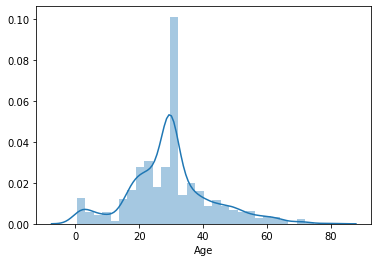

In [35]:
sns.distplot(tit['Age'])

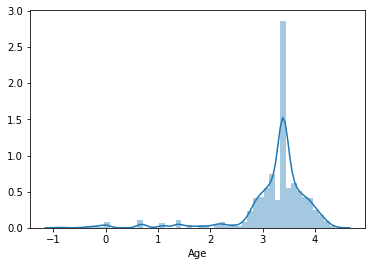

In [36]:
sns.distplot(np.log(tit['Age']))

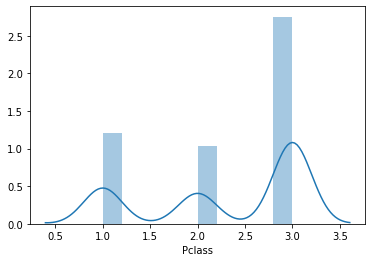

In [37]:
sns.distplot(tit['Pclass'])

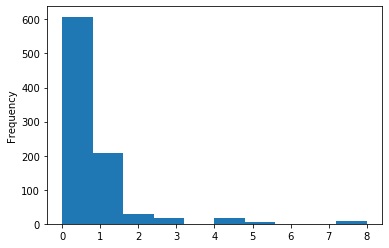

In [38]:
tit['SibSp'].plot.hist()

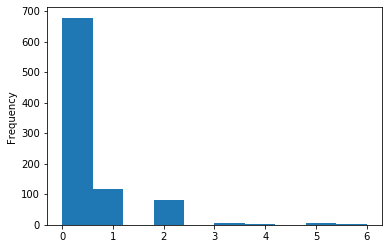

In [39]:
tit['Parch'].plot.hist()

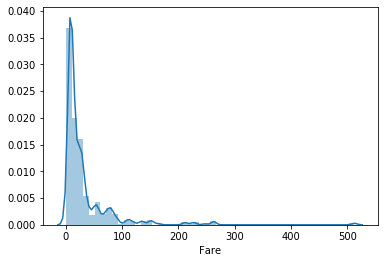

In [40]:
sns.distplot(tit['Fare'])

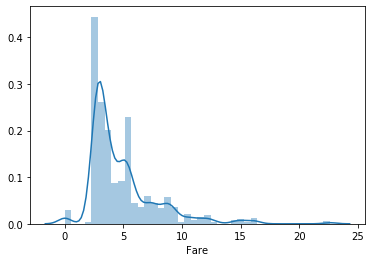

In [41]:
sns.distplot(np.sqrt(tit['Fare']))

fare is skewed

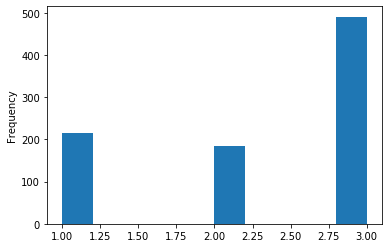

In [42]:
tit['Pclass'].plot.hist()

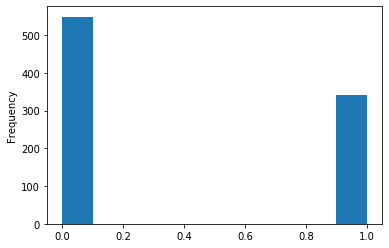

In [43]:
tit['Survived'].plot.hist()

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

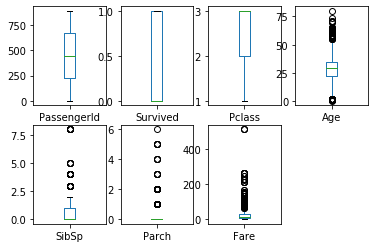

In [44]:
tit.plot(kind='box', subplots=True, layout=(2,4))

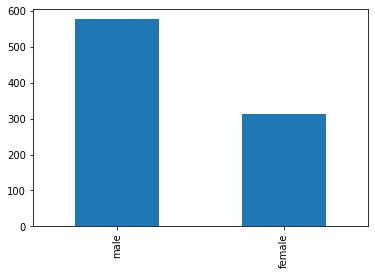

In [45]:
tit['Sex'].value_counts().plot.bar()

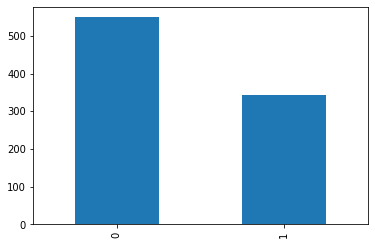

In [46]:
tit['Survived'].value_counts().plot.bar()

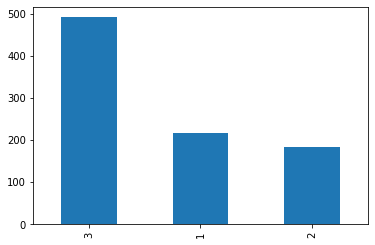

In [47]:
tit['Pclass'].value_counts().plot.bar()

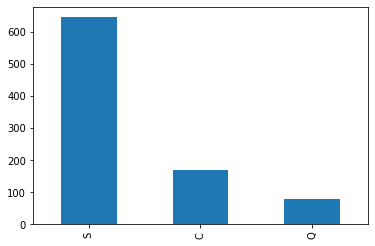

In [48]:
tit['Embarked'].value_counts().plot.bar()

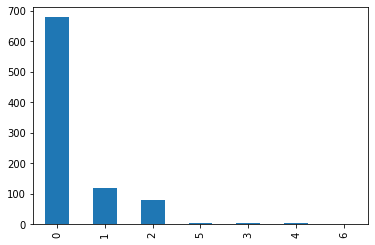

In [49]:
tit['Parch'].value_counts().plot.bar()

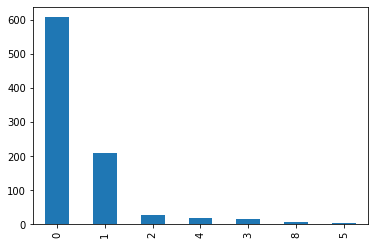

In [50]:
tit['SibSp'].value_counts().plot.bar()

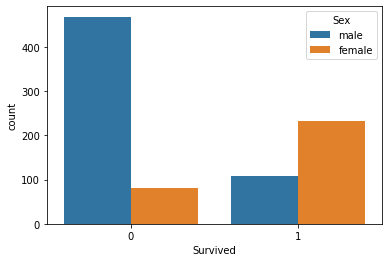

In [51]:
sns.countplot(data=tit, x='Survived', hue='Sex')

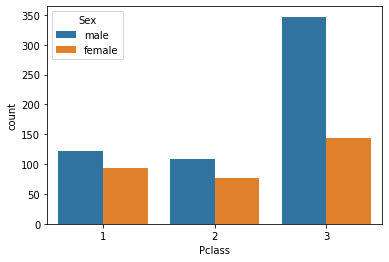

In [52]:
sns.countplot(data=tit, x='Pclass', hue='Sex')

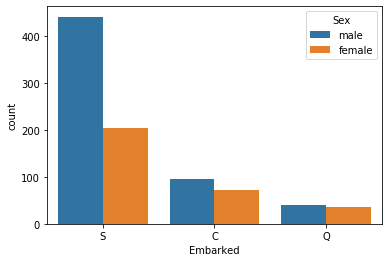

In [53]:
sns.countplot(data=tit, x='Embarked', hue='Sex')

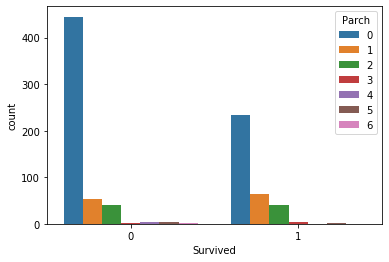

In [54]:
sns.countplot(data=tit, x='Survived', hue='Parch')

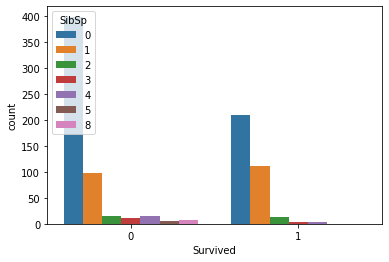

In [55]:
sns.countplot(data=tit, x='Survived', hue='SibSp')

# Bivariate Analysis

In [56]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

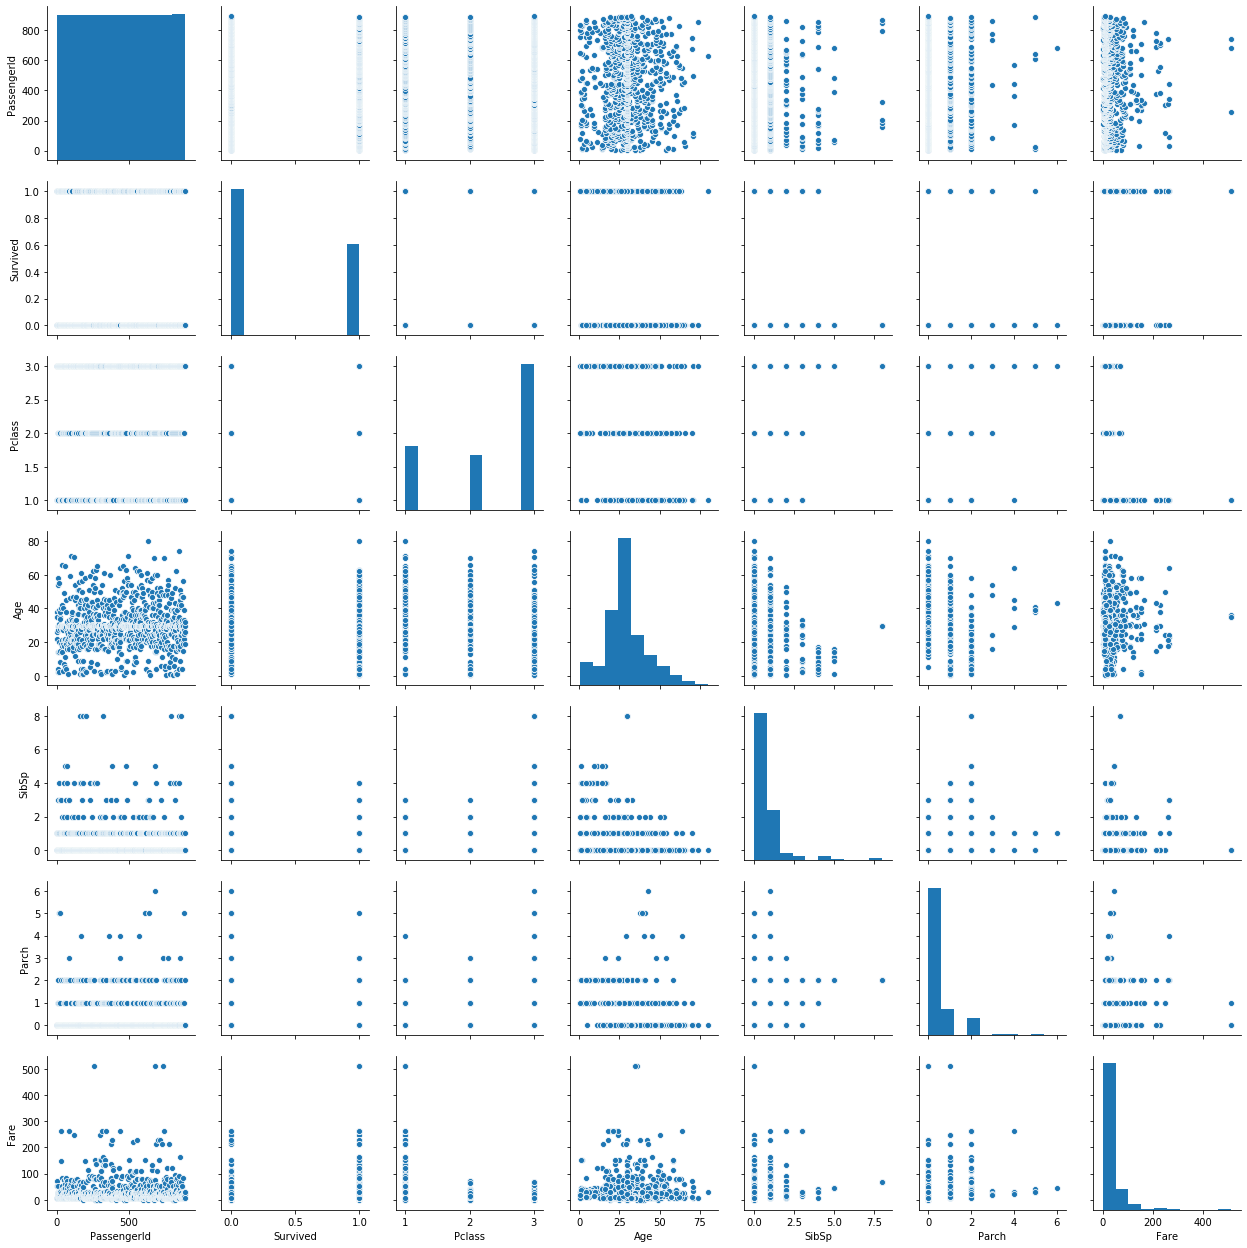

In [57]:
sns.pairplot(tit)

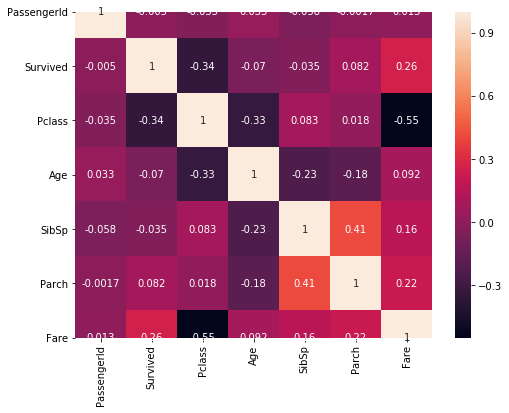

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(tit.corr(), annot=True)

there is no strong correlation

neither is there any strong negative correlation

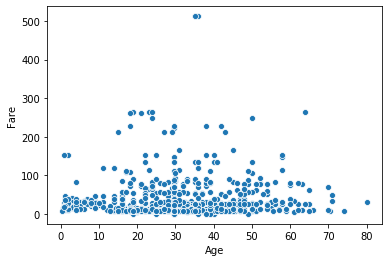

In [59]:
sns.scatterplot(x=tit['Age'], y=tit['Fare'])

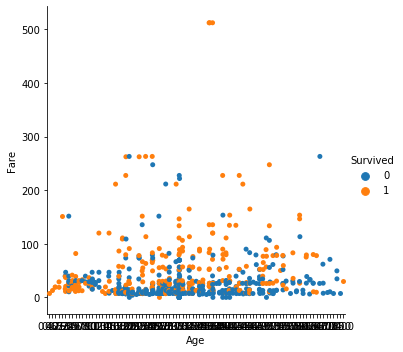

In [60]:
sns.catplot(data=tit, x='Age', y='Fare', hue='Survived')

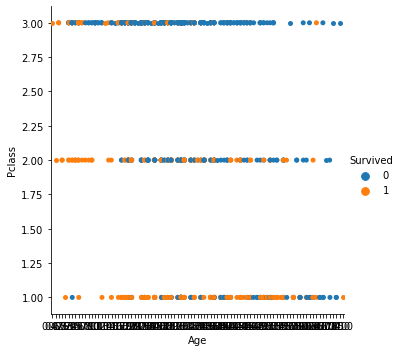

In [61]:
sns.catplot(data=tit, x='Age', y='Pclass', hue='Survived')

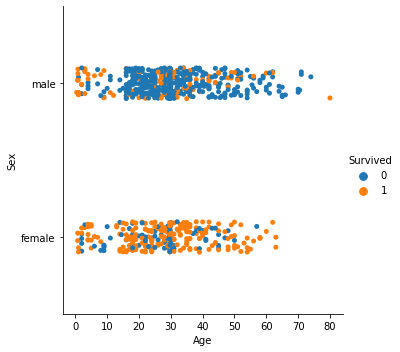

In [62]:
sns.catplot(data=tit, x='Age', y='Sex', hue='Survived')

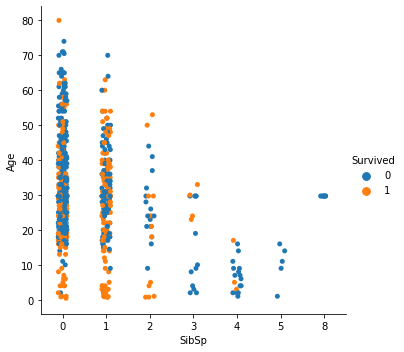

In [63]:
sns.catplot(data=tit, x='SibSp', y='Age', hue='Survived')

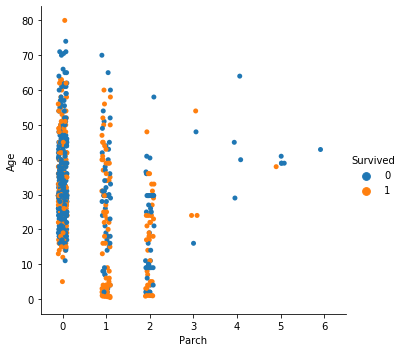

In [64]:
sns.catplot(data=tit, x='Parch', y='Age', hue='Survived')

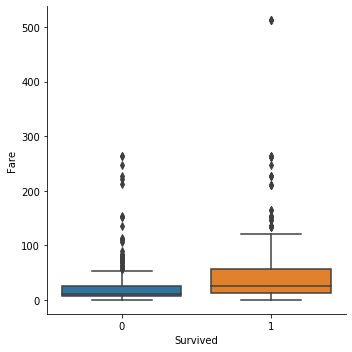

In [65]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='box')

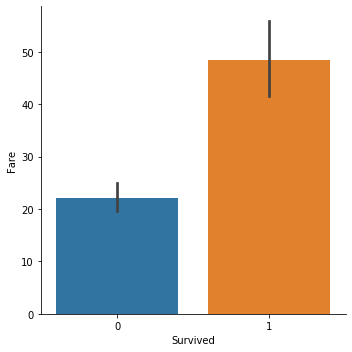

In [66]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='bar')

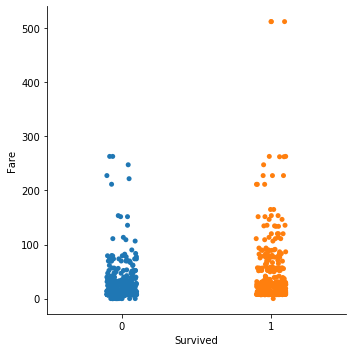

In [67]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='strip')

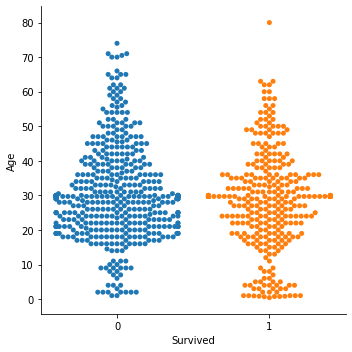

In [68]:
sns.catplot(data=tit, x='Survived', y='Age', kind='swarm')

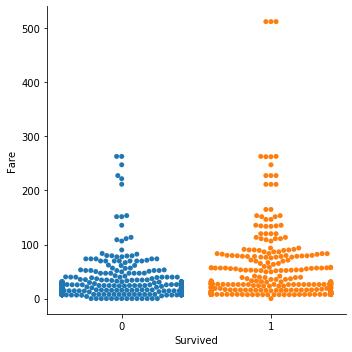

In [69]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='swarm')

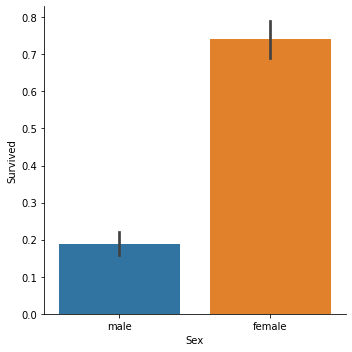

In [70]:
sns.catplot(data=tit, x='Sex', y='Survived', kind='bar')

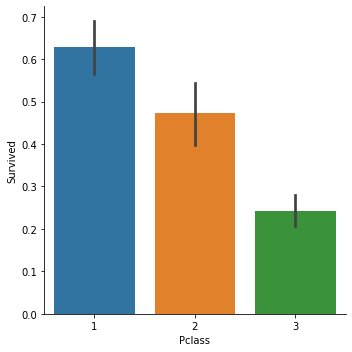

In [71]:
sns.catplot(data=tit, x='Pclass', y='Survived', kind='bar')

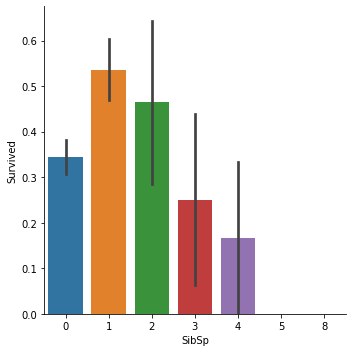

In [72]:
sns.catplot(data=tit, x='SibSp', y='Survived', kind='bar')

In [73]:
pd.crosstab(tit['Survived'], tit['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


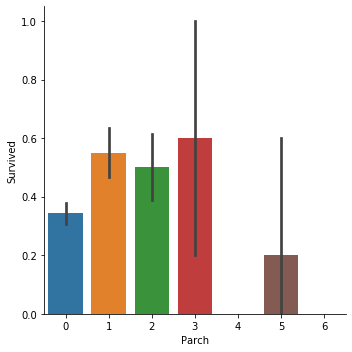

In [74]:
sns.catplot(data=tit, x='Parch', y='Survived', kind='bar')

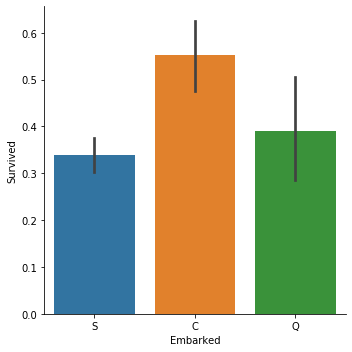

In [75]:
sns.catplot(data=tit, x='Embarked', y='Survived', kind='bar')

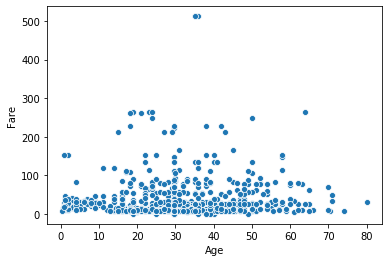

In [76]:
sns.scatterplot(data=tit, x='Age', y='Fare')

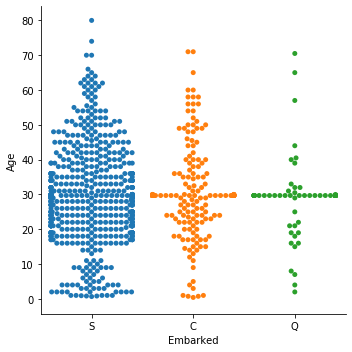

In [77]:
sns.catplot(data=tit, x='Embarked', y='Age', kind='swarm')

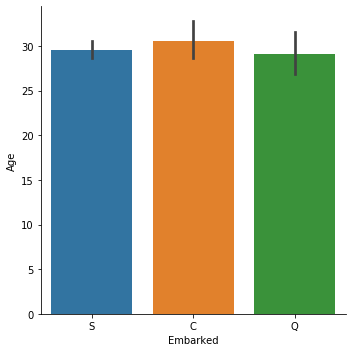

In [78]:
sns.catplot(data=tit, x='Embarked', y='Age', kind='bar')

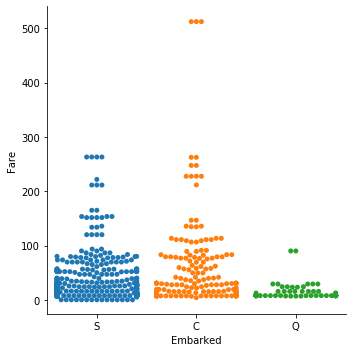

In [79]:
sns.catplot(data=tit, x='Embarked', y='Fare', kind='swarm')

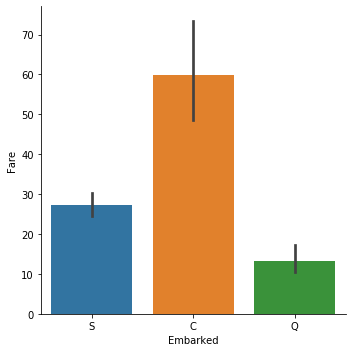

In [80]:
sns.catplot(data=tit, x='Embarked', y='Fare', kind='bar')

# Outlier detection and treatment

In [81]:
from scipy.stats import zscore

In [82]:
x=tit.iloc[:,[5,6,7,9]]

In [83]:
x.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [84]:
z=np.abs(zscore(x))

In [85]:
tup=np.where(z>3)
index=[]
for i in tup[0]:
    index.append(i)

In [86]:
tit=tit.drop(labels=index)

In [87]:
tit.shape

(820, 12)

is this outlier removal correct?

In [88]:
# trying the above method of outlier detection on iris dataset coz all variables are continuous

In [89]:
i=pd.read_csv('iris.csv')

In [90]:
ii=i.iloc[:,:-1]
ii

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
zi=np.abs(zscore(ii))

In [92]:
np.where(zi>3)

(array([15], dtype=int64), array([1], dtype=int64))

In [93]:
ii.iloc[15,1]

4.4

In [94]:
ii.head(17)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [95]:
i=i[(zi<3).all(axis=1)]

In [96]:
i.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [97]:
q=pd.read_csv('iris.csv')

In [98]:
q.head(20)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


yes, the above method is correct method for outlier detection

In [99]:
# now, checking outliers again

In [100]:
ii=i.iloc[:,:-1]
ii

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
zi=np.abs(zscore(ii))

In [102]:
np.where(zi>3)

(array([], dtype=int64), array([], dtype=int64))

but in our original tit dataset, there are ouliers in 2nd chance also

why is that so?

In [103]:
# drawing boxplot for tit again to check for the outliers

In [104]:
# tit.head(1)

In [105]:
# temp=tit.iloc[:,[5,6,7,9]]
# temp.head()

In [106]:
# zt=np.abs(zscore(temp))
# np.where(zt>3)

In [107]:
# tit=tit[(zt<3).all(axis=1)]

In [108]:
tit.shape

(820, 12)

PassengerId       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Survived       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Pclass         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age            AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare              AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

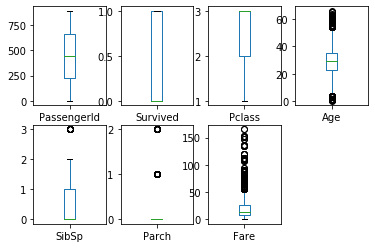

In [109]:
tit.plot(kind='box', subplots=True, layout=(2,4))

it is still showing some outliers

# Variable Transformation

In [110]:
# dropping cabin column

In [111]:
tit.drop(labels=['Cabin'], axis=1, inplace=True)

In [112]:
tit.shape

(820, 11)

In [113]:
# skewness reduction---> Not needed

In [114]:
tit['Ticket'].value_counts()

1601            7
S.O.C. 14879    5
347088          4
17421           4
LINE            4
               ..
A/5 21173       1
315093          1
374746          1
347074          1
231945          1
Name: Ticket, Length: 659, dtype: int64

In [115]:
tit.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

# Model Selection

since it is a problem of categorical label with only 2 categories, we'll use:

Logistic Regression

KNN

DecisionTree

GaussianNB

SVM

and then cross_val

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
from sklearn.svm import SVC

In [120]:
from sklearn.naive_bayes import GaussianNB

In [121]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [122]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
tit.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
tit.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [127]:
le=LabelEncoder()

In [128]:
tit['Sex']=le.fit_transform(tit['Sex'])
tit['Sex'].head(5)

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [129]:
tit['Embarked']=le.fit_transform(tit['Embarked'])
tit['Embarked'].head(5)

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int32

In [130]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [131]:
x=tit.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [132]:
x.shape

(820, 7)

In [133]:
y=tit.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [134]:
y.shape

(820,)

In [135]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=45)

In [136]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(656, 7)
(164, 7)
(656,)
(164,)


In [137]:
model=[LogisticRegression(), DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy'),
      SVC(kernel='rbf'), GaussianNB()]

In [138]:
for i in range(5,15):
    print('\n')
    print('n_neighbors= ', i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y=knn.predict(x_test)
    print('Accuracy Score: ', accuracy_score(y,y_test))
    print('\n')
    print('Confusion Matrix: ', confusion_matrix(y,y_test))
    print('\n')
    print('Classification Report: ', classification_report(y,y_test))
    print('\n')
    print('\n')



n_neighbors=  5
Accuracy Score:  0.6585365853658537


Confusion Matrix:  [[72 31]
 [25 36]]


Classification Report:                precision    recall  f1-score   support

           0       0.74      0.70      0.72       103
           1       0.54      0.59      0.56        61

    accuracy                           0.66       164
   macro avg       0.64      0.64      0.64       164
weighted avg       0.67      0.66      0.66       164







n_neighbors=  6
Accuracy Score:  0.6646341463414634


Confusion Matrix:  [[82 40]
 [15 27]]


Classification Report:                precision    recall  f1-score   support

           0       0.85      0.67      0.75       122
           1       0.40      0.64      0.50        42

    accuracy                           0.66       164
   macro avg       0.62      0.66      0.62       164
weighted avg       0.73      0.66      0.68       164







n_neighbors=  7
Accuracy Score:  0.6951219512195121


Confusion Matrix:  [[81 34]
 [16 33]]


Cl

maximum is 0.7256 at n=10

In [139]:
for m in model:
    print('\n')
    print('Model= ', m)
    m.fit(x_train, y_train)
    y=m.predict(x_test)
    print('Accuracy Score: ', accuracy_score(y,y_test))
    print('\n')
    print('Confusion Matrix: ', confusion_matrix(y,y_test))
    print('\n')
    print('Classification Report: ', classification_report(y,y_test))
    print('\n')
    print('\n')



Model=  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score:  0.7987804878048781


Confusion Matrix:  [[85 21]
 [12 46]]


Classification Report:                precision    recall  f1-score   support

           0       0.88      0.80      0.84       106
           1       0.69      0.79      0.74        58

    accuracy                           0.80       164
   macro avg       0.78      0.80      0.79       164
weighted avg       0.81      0.80      0.80       164







Model=  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
        

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


max is LogisticRegression at 0.7987

In [140]:
# Why SVC('Poly') in not working in titanic?

In [151]:
for i in range(3,11):
    print('cv_folds= ', i)
    for m in model:
        print('\n')
        print('Model= ', m)
        print('\n')
        score=cross_val_score(m,x,y,cv=i)
        print('Score= ', score)
        print('\n')
        print(score.mean(), score.std())
        print('\n')
        y_pred=cross_val_predict(m,x,y,cv=i)
        print('Accuracy Score: ', accuracy_score(y,y_pred))
        print('\n')
        print('Confusion Matrix: ', confusion_matrix(y,y_pred))
        print('\n')
        print('Classification Report: ', classification_report(y,y_pred))
        print('\n')
        print('\n')

cv_folds=  3


Model=  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Score=  [0.78832117 0.79927007 0.79411765]


0.7939029626449119 0.004472448831257948


Accuracy Score:  0.7939024390243903


Confusion Matrix:  [[430  70]
 [ 99 221]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.84       500
           1       0.76      0.69      0.72       320

    accuracy                           0.79       820
   macro avg       0.79      0.78      0.78       820
weighted avg       0.79      0.79      0.79       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Score=  [0.64963504 0.68248175 0.73161765]


0.6879114784599971 0.03368875734483852


Accuracy Score:  0.6878048780487804


Confusion Matrix:  [[397 103]
 [153 167]]


Classification Report:                precision    recall  f1-score   support

           0       0.72      0.79      0.76       500
           1       0.62      0.52      0.57       320

    accuracy                           0.69       820
   macro avg       0.67      0.66      0.66       820
weighted avg       0.68      0.69      0.68       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.72627737 0.79927007 0.79044118]


0.7719962072420209 0.03252841073425168


Accuracy Score:  0.7719512195121951


Confusion Matrix:  [[409  91]
 [ 96 224]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       500
           1       0.71      0.70      0.71       320

    accuracy                           0.77       820
   macro a

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warn

Accuracy Score:  0.7609756097560976


Confusion Matrix:  [[400 100]
 [ 96 224]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.80      0.80       500
           1       0.69      0.70      0.70       320

    accuracy                           0.76       820
   macro avg       0.75      0.75      0.75       820
weighted avg       0.76      0.76      0.76       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.72682927 0.7804878  0.77560976 0.74146341]


0.7560975609756098 0.022618581696331005


Accuracy Score:  0.751219512195122


Confusio

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Accuracy Score:  0.697560975609756


Confusion Matrix:  [[399 101]
 [147 173]]


Classification Report:                precision    recall  f1-score   support

           0       0.73      0.80      0.76       500
           1       0.63      0.54      0.58       320

    accuracy                           0.70       820
   macro avg       0.68      0.67      0.67       820
weighted avg       0.69      0.70      0.69       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.72682927 0.77560976 0.80487805 0.7804878 ]


0.7719512195121951 0.02831265064937539


Accuracy Score:  0.7719512195121951


Confusion Matrix:  [[409  91]
 [ 96 224]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       500
           1       0.71      0.70      0.71       320

    accuracy                           0.77       820
   macro avg       0.76      0.76      0.76       820
weighted avg       0.77      0.7

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix:  [[394 106]
 [100 220]]


Classification Report:                precision    recall  f1-score   support

           0       0.80      0.79      0.79       500
           1       0.67      0.69      0.68       320

    accuracy                           0.75       820
   macro avg       0.74      0.74      0.74       820
weighted avg       0.75      0.75      0.75       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.70731707 0.77439024 0.79878049 0.76829268 0.7804878 ]


0.7658536585365854 0.03099576835887523


Accuracy Score:  0.7682926829268293


Confusion Matrix:  [[402  98]
 [ 92

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.59756098 0.68292683 0.74390244 0.73780488 0.76219512]


0.7048780487804878 0.05981828521185718


Accuracy Score:  0.7048780487804878


Confusion Matrix:  [[392 108]
 [134 186]]


Classification Report:                precision    recall  f1-score   support

           0       0.75      0.78      0.76       500
           1       0.63      0.58      0.61       320

    accuracy                           0.70       820
   macro avg       0.69      0.68      0.68       820
weighted avg       0.70      0.70      0.70       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.70731707 0.79268293 0.7804878  0.79268293 0.77439024]


0.7695121951219512 0.03189438251371227


Accuracy Score:  0.7695121951219512




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warn

Confusion Matrix:  [[410  90]
 [ 99 221]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       500
           1       0.71      0.69      0.70       320

    accuracy                           0.77       820
   macro avg       0.76      0.76      0.76       820
weighted avg       0.77      0.77      0.77       820





cv_folds=  6


Model=  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Score=  [0.7826087  0.79710145 0.82352941 0.77941176 0.77941176 0.80147059]


0.7939222790565501 0.015773255977688333


Accuracy Score:  0.7939024390243903


Confusion Matrix:  [[429  71]
 [ 98 222]]


Classification Report:                precision  

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score=  [0.7173913  0.73913043 0.80147059 0.78676471 0.77941176 0.75735294]


0.7635869565217391 0.028849681841028443


Accuracy Score:  0.7695121951219512


Confusion Matrix:  [[409  91]
 [ 98 222]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       500
           1       0.71      0.69      0.70       320

    accuracy                           0.77       820
   macro avg       0.76      0.76      0.76       820
weighted avg       0.77      0.77      0.77       820







Model=  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.58695652 0.6884058  0.72794118 0.67647059 0.71323529 0.78676471]


0.6966290139244103 0.06039136526748255


Accuracy Score:  0.6963414634146341


Confusion Matrix:  [[390 110]
 [139 181]]


Classification Report:                precision    recall  f1-score   support

           0       0.74      0.78      0.76       500
           1       0.62      0.57      0.59       320

    accuracy                           0.70       820
   macro avg       0.68      0.67      0.68       820
weighted avg       0.69      0.70      0.69       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.71014493 0.77536232 0.80147059 0.79411765 0.78676471 0.77205882]


0.773319835180449 0.030007247098035476




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warn

Accuracy Score:  0.7731707317073171


Confusion Matrix:  [[406  94]
 [ 92 228]]


Classification Report:                precision    recall  f1-score   support

           0       0.82      0.81      0.81       500
           1       0.71      0.71      0.71       320

    accuracy                           0.77       820
   macro avg       0.76      0.76      0.76       820
weighted avg       0.77      0.77      0.77       820





cv_folds=  7


Model=  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Score=  [0.78813559 0.81355932 0.81355932 0.76923077 0.8034188  0.75862069
 0.81034483]


0.7938384753112983 0.020772304474238633


Accuracy Score:  0.7939024390243903


Confusion Matrix:  [[431  69]
 [100 220]]



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix:  [[400 100]
 [ 95 225]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.80      0.80       500
           1       0.69      0.70      0.70       320

    accuracy                           0.76       820
   macro avg       0.75      0.75      0.75       820
weighted avg       0.76      0.76      0.76       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.72881356 0.70338983 0.73728814 0.81196581 0.82905983 0.75862069
 0.77586207]


0.7635714178671513 0.04196437657570311


Accuracy Score:  0.7695121951219512


Confusion Ma

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.61016949 0.6779661  0.71186441 0.72649573 0.71794872 0.72413793
 0.79310345]


0.7088122605363986 0.05130755627897872


Accuracy Score:  0.7085365853658536




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Confusion Matrix:  [[399 101]
 [138 182]]


Classification Report:                precision    recall  f1-score   support

           0       0.74      0.80      0.77       500
           1       0.64      0.57      0.60       320

    accuracy                           0.71       820
   macro avg       0.69      0.68      0.69       820
weighted avg       0.70      0.71      0.70       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.71186441 0.77966102 0.80508475 0.76068376 0.82905983 0.76724138
 0.78448276]


0.7768682710237357 0.034155162366066354


Accuracy Score:  0.776829268292683


Confusion Matrix:  [[409  91]
 [ 92 228]]


Classification Report:                precision    recall  f1-score   support

           0       0.82      0.82      0.82       500
           1       0.71      0.71      0.71       320

    accuracy                           0.78       820
   macro avg       0.77      0.77      0.77       820
weighted avg       0.78      0.78  

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Confusion Matrix:  [[431  69]
 [ 98 222]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.84       500
           1       0.76      0.69      0.73       320

    accuracy                           0.80       820
   macro avg       0.79      0.78      0.78       820
weighted avg       0.79      0.80      0.79       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.7184466  0.70873786 0.75728155 0.82524272 0.79411765 0.82352941
 0.71568627 0.82352941]


0.7708214353702646 0.04858157887762691


Accuracy Score:  0.775609756097561


Confu

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.60194175 0.65048544 0.67961165 0.74757282 0.71568627 0.7254902
 0.7745098  0.7745098 ]


0.7087259661146011 0.057157743996765355




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Accuracy Score:  0.7085365853658536


Confusion Matrix:  [[397 103]
 [136 184]]


Classification Report:                precision    recall  f1-score   support

           0       0.74      0.79      0.77       500
           1       0.64      0.57      0.61       320

    accuracy                           0.71       820
   macro avg       0.69      0.68      0.69       820
weighted avg       0.70      0.71      0.71       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.70873786 0.74757282 0.78640777 0.7961165  0.82352941 0.78431373
 0.76470588 0.79411765]


0.7756877022653721 0.03284144510062269


Accuracy Score:  0.775609756097561


Confusion Matrix:  [[410  90]
 [ 94 226]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.82       500
           1       0.72      0.71      0.71       320

    accuracy                           0.78       820
   macro avg       0.76      0.76      0.

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy Score:  0.7939024390243903


Confusion Matrix:  [[428  72]
 [ 97 223]]


Classification Report:                precision    recall  f1-score   support

           0       0.82      0.86      0.84       500
           1       0.76      0.70      0.73       320

    accuracy                           0.79       820
   macro avg       0.79      0.78      0.78       820
weighted avg       0.79      0.79      0.79       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.67391304 0.75       0.72826087 0.82608696 0.75       0.76666667
 0.82222222 0.76666667 0.77777778]


0.7623993558776168 0.0437296661806

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.61956522 0.61956522 0.70652174 0.75       0.7826087  0.68888889
 0.75555556 0.76666667 0.82222222]


0.7235104669887279 0.06660343022163619




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:  0.723170731707317


Confusion Matrix:  [[402  98]
 [129 191]]


Classification Report:                precision    recall  f1-score   support

           0       0.76      0.80      0.78       500
           1       0.66      0.60      0.63       320

    accuracy                           0.72       820
   macro avg       0.71      0.70      0.70       820
weighted avg       0.72      0.72      0.72       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.72826087 0.70652174 0.75       0.81521739 0.79347826 0.78888889
 0.8        0.75555556 0.77777778]


0.7684111647879763 0.033781474496227565


Accuracy Score:  0.7682926829268293


Confusion Matrix:  [[404  96]
 [ 94 226]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.81      0.81       500
           1       0.70      0.71      0.70       320

    accuracy                           0.77       820
   macro avg       0.76      

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Accuracy Score:  0.7914634146341464


Confusion Matrix:  [[430  70]
 [101 219]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       500
           1       0.76      0.68      0.72       320

    accuracy                           0.79       820
   macro avg       0.78      0.77      0.78       820
weighted avg       0.79      0.79      0.79       820







Model=  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Score=  [0.74390244 0.76829268 0.73170732 0.73170732 0.84146341 0.79268293
 0.82926829 0.68292683 0.80487805 0.84146341]


0.776829268292683 0.051

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Score=  [0.68292683 0.57317073 0.70731707 0.69512195 0.75609756 0.74390244
 0.75609756 0.7195122  0.73170732 0.81707317]


0.7182926829268292 0.060350453812968885




C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Accuracy Score:  0.7182926829268292


Confusion Matrix:  [[399 101]
 [130 190]]


Classification Report:                precision    recall  f1-score   support

           0       0.75      0.80      0.78       500
           1       0.65      0.59      0.62       320

    accuracy                           0.72       820
   macro avg       0.70      0.70      0.70       820
weighted avg       0.71      0.72      0.72       820







Model=  GaussianNB(priors=None, var_smoothing=1e-09)


Score=  [0.7195122  0.7195122  0.7804878  0.80487805 0.79268293 0.79268293
 0.82926829 0.75609756 0.75609756 0.7804878 ]


0.7731707317073171 0.03370798770996405


Accuracy Score:  0.7731707317073171


Confusion Matrix:  [[409  91]
 [ 95 225]]


Classification Report:                precision    recall  f1-score   support

           0       0.81      0.82      0.81       500
           1       0.71      0.70      0.71       320

    accuracy                           0.77       820
   macro avg      

best is cv=4 and LogisticRegression at 0.7987

In [145]:
x=tit.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [146]:
y=tit.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [153]:
for j in range(3,11):
    print('cv_folds= ', j)
    for i in range(5,15):
        print('\n')
        print('n_neighbors= ', i)
        print('\n')
        knn=KNeighborsClassifier(n_neighbors=i)
        score=cross_val_score(knn,x,y,cv=i)
        print('Score= ', score.mean())
        print('\n')
        y_pred=cross_val_predict(knn,x,y,cv=i)
        print('Accuracy Score: ', accuracy_score(y,y_pred))
        print('\n')

cv_folds=  3


n_neighbors=  5


Score=  0.6951219512195121


Accuracy Score:  0.6951219512195121




n_neighbors=  6


Score=  0.680662119920432


Accuracy Score:  0.6804878048780488




n_neighbors=  7


Score=  0.6966018915171458


Accuracy Score:  0.6963414634146341




n_neighbors=  8


Score=  0.6829906719969541


Accuracy Score:  0.6829268292682927




n_neighbors=  9


Score=  0.7015834675254965


Accuracy Score:  0.7012195121951219




n_neighbors=  10


Score=  0.7097560975609756


Accuracy Score:  0.7097560975609756




n_neighbors=  11


Score=  0.7027233932497091


Accuracy Score:  0.7024390243902439




n_neighbors=  12


Score=  0.7076213137212489


Accuracy Score:  0.7073170731707317




n_neighbors=  13


Score=  0.708932140887786


Accuracy Score:  0.7085365853658536




n_neighbors=  14


Score=  0.7184175371215883


Accuracy Score:  0.7182926829268292


cv_folds=  4


n_neighbors=  5


Score=  0.6951219512195121


Accuracy Score:  0.6951219512195121




n_neighbors=

The best model is logistic regression with accuracy score of 0.7987

# Saving the model

In [154]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y=log_reg.predict(x_test)
print(accuracy_score(y,y_test))

0.7987804878048781


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [155]:
from sklearn.externals import joblib

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [156]:
joblib.dump(log_reg,'log_reg.obj')

['log_reg.obj']

In [157]:
import pickle
saved_model=pickle.dumps(log_reg)